In [23]:
!pip install 'itkwidgets[lab]>=1.0a37' 'ngff-zarr[dask-image]' 'tifffile==2023.9.26' 'itk>=5.3.0' zarr

Defaulting to user installation because normal site-packages is not writeable


Make sure that ImJoy extension is loaded, else reload the page.

In [24]:
%%javascript
let needReload = (typeof window.loadImJoyRPC === "undefined");
if (needReload) {
    needReload = false;
    location.reload();
}

<IPython.core.display.Javascript object>

In [26]:
import os
from ipyfilechooser import FileChooser

import zarr
from ngff_zarr import (
    detect_cli_io_backend,
    cli_input_to_ngff_image,
    to_multiscales,
    to_ngff_zarr,
    Methods,
    config
)
from itkwidgets import view

input_chooser = FileChooser('/alsuser')
input_chooser.show_only_dirs = True
input_chooser.title = f'Directory with image files.'
display(input_chooser)

FileChooser(path='/alsuser', filename='', title='Directory with image files.', show_hidden=False, select_desc=…

In [27]:
# Collect input files and set output zarr directory
if input_chooser.selected_path is None:
    raise TypeError("You forgot to set a image file directory")

image_dir = input_chooser.selected_path
file_names = os.listdir(image_dir)
file_paths = [os.path.join(image_dir, file_name) for file_name in file_names if not file_name.startswith('.')]
file_paths.sort()
out_zarr_directory = os.path.abspath(os.path.join(image_dir, '..', os.path.basename(image_dir) + '.zarr'))
print('Output directory: ' + out_zarr_directory)

Output directory: /alsuser/notebooks/output/20220923_154543_ethan_robin_SiCircuit.zarr


In [ ]:
# Build NGFF Zarr directory
config.cache_store = zarr.storage.DirectoryStore("/alsuser/pscratch/zarr-ngff-cache", dimension_separator="/")
backend = detect_cli_io_backend(file_paths)
image = cli_input_to_ngff_image(backend, file_paths)
multiscales = to_multiscales(image, method=Methods.DASK_IMAGE_GAUSSIAN)
to_ngff_zarr(out_zarr_directory, multiscales)
print('NGFF Zarr created')


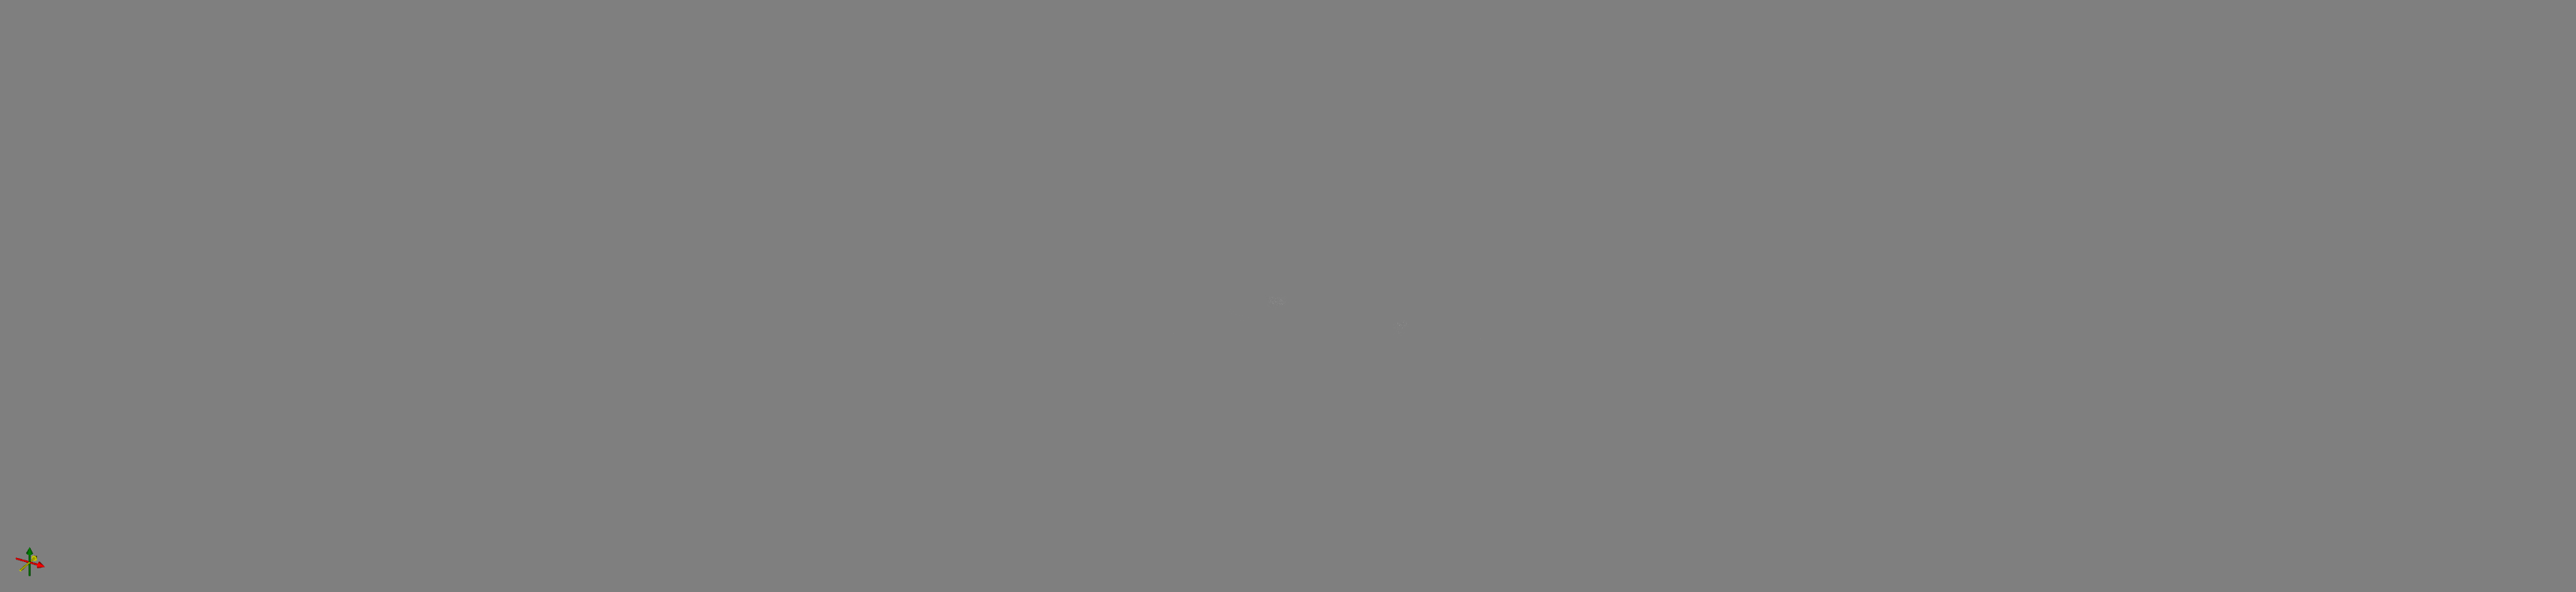
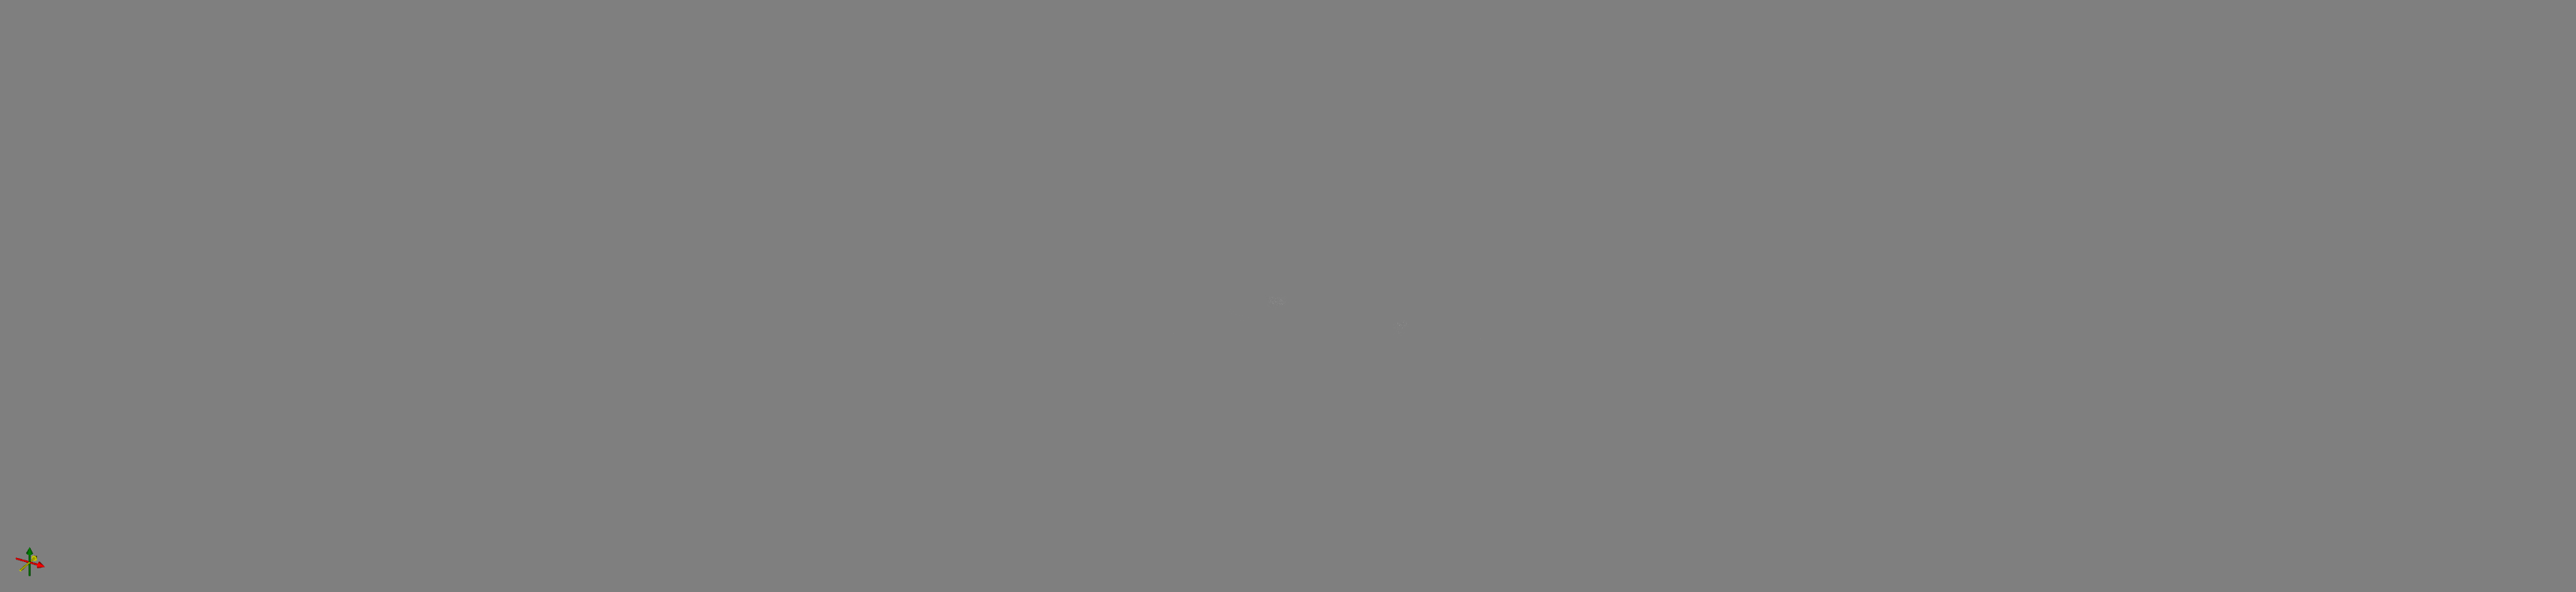

<IPython.core.display.Javascript object>

In [10]:
# View image with itkwidgets
fsstore = zarr.storage.FSStore(out_zarr_directory)
recon_image = zarr.open_group(fsstore, mode='r')

viewer = view(recon_image)
viewer.set_image_color_map('Grayscale')
viewer.set_image_gradient_opacity_scale(.2)
viewer.set_image_gradient_opacity(.2)